In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
#To display our data on a graph at a later point, we can only take two variables (annual income and spending score).
dataset = pd.read_csv('./Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


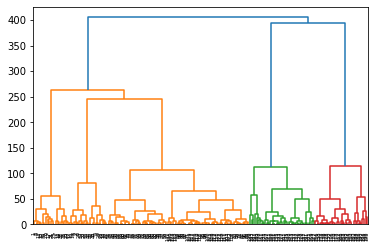

In [3]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [4]:
#The labels_ property returns an array of integers where the values correspond to the distinct categories.
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

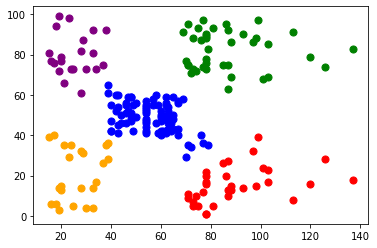

In [5]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [6]:
data = pd.read_csv('Wholesale customers data.csv')
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [8]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


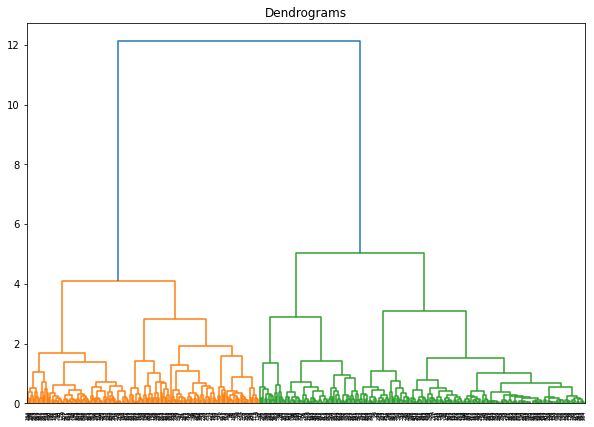

In [9]:
#Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. 
#Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

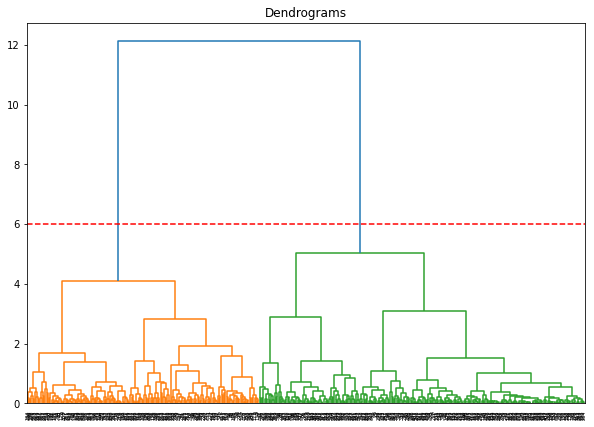

In [10]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [11]:
#We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

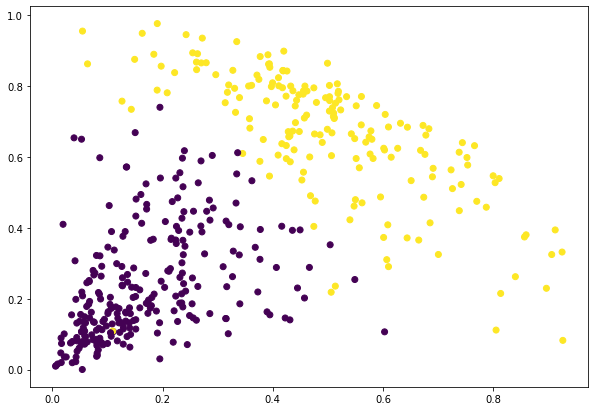

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

# Exemplo Dendrograma slide 25 - Parte III
#Partindo da matriz de distâncias e linkage do tipo simples

https://stackoverflow.com/questions/41416498/dendrogram-or-other-plot-from-distance-matrix

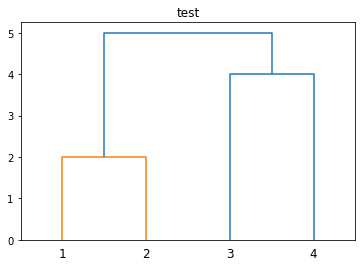

array([2., 5., 5., 5., 5., 4.])

In [13]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

mat = np.array([[0.0, 2.0, 7.0, 13.0], 
                [2.0, 0.0, 5.0,10.0], 
                [7.0, 5.0, 0.0,4.0], 
                [13.0, 10.0, 4.0,0.0]])

dists = squareform(mat)

linkage_matrix = linkage(dists, method="single")
dendrogram(linkage_matrix, labels=["1", "2", "3","4"])
plt.title("test")
plt.show()

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(linkage_matrix, dists)
coph_dists

#ref. https://stackoverflow.com/questions/41416498/dendrogram-or-other-plot-from-distance-matrix
#página 28

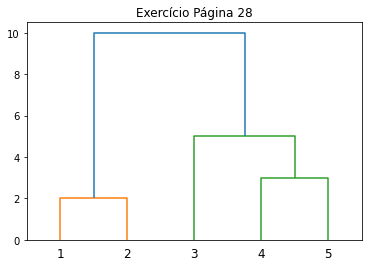

array([ 2., 10., 10., 10., 10., 10., 10.,  5.,  5.,  3.])

In [14]:
mat = np.array([[0.0, 2.0, 6.0, 10.0, 9.0], 
                [2.0, 0.0, 5.0, 9.0,  8.0],
                [6.0, 5.0, 0.0, 4.0,  5.0], 
                [10.0,9.0, 4.0, 0.0,  3.0],
                [9.0, 8.0, 5.0, 3.0,  0.0]
               ])
dists = squareform(mat)

linkage_matrix = linkage(dists, method="complete")
dendrogram(linkage_matrix, labels=["1", "2", "3","4","5"])
plt.title("Exercício Página 28")
plt.show()
c, coph_dists = cophenet(linkage_matrix, dists)
coph_dists

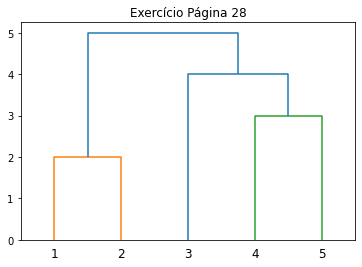

array([2., 5., 5., 5., 5., 5., 5., 4., 4., 3.])

In [15]:
mat = np.array([[0.0, 2.0, 6.0, 10.0, 9.0], 
                [2.0, 0.0, 5.0, 9.0,  8.0],
                [6.0, 5.0, 0.0, 4.0,  5.0], 
                [10.0,9.0, 4.0, 0.0,  3.0],
                [9.0, 8.0, 5.0, 3.0,  0.0]
               ])
dists = squareform(mat)

linkage_matrix = linkage(dists, method="single")
dendrogram(linkage_matrix, labels=["1", "2", "3","4","5"])
plt.title("Exercício Página 28")
plt.show()
c, coph_dists = cophenet(linkage_matrix, dists)
coph_dists

reference: 
https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
https://towardsdatascience.com/hierarchical-clustering-in-python-using-dendrogram-and-cophenetic-correlation-8d41a08f7eab

## Exemplo Dendrograma slide 12 - Parte IV (Prova 2)

In [16]:
#Hierarchical Clustering - Average method

In [17]:
#Slide 8 - Gerar a hierarquia para a matriz de proximidades:
mat = np.array([[1.00, 0.90, 0.10, 0.65, 0.20], 
                 [0.90, 1.00, 0.70, 0.60, 0.50],
                 [0.10, 0.70, 1.00, 0.40, 0.30], 
                 [0.65, 0.60, 0.40, 1.00, 0.80],
                 [0.20, 0.50, 0.30, 0.80, 1.00]
                ])
mat = 1- mat #converte a matriz de similaridade na matriz de distancia

#Obtenha o dendrograma completo de execução do método average linkage (UPGMA) sobre a matriz de distâncias abaixo
mat = np.array([[0.0, 2.0, 6.0, 10.0, 9.0], 
                [2.0, 0.0, 5.0, 9.0,  8.0],
                [6.0, 5.0, 0.0, 4.0,  5.0], 
                [10.0,9.0, 4.0, 0.0,  3.0],
                [9.0, 8.0, 5.0, 3.0,  0.0]
               ])
mat

array([[ 0.,  2.,  6., 10.,  9.],
       [ 2.,  0.,  5.,  9.,  8.],
       [ 6.,  5.,  0.,  4.,  5.],
       [10.,  9.,  4.,  0.,  3.],
       [ 9.,  8.,  5.,  3.,  0.]])

In [18]:
dists = squareform(mat) #Convert a vector-form distance vector to a square-form distance matrix, and vice-versa.
dists

array([ 2.,  6., 10.,  9.,  5.,  9.,  8.,  4.,  5.,  3.])

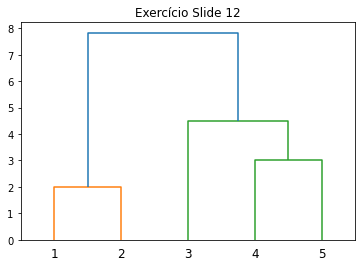

array([2.        , 7.83333333, 7.83333333, 7.83333333, 7.83333333,
       7.83333333, 7.83333333, 4.5       , 4.5       , 3.        ])

In [19]:
linkage_matrix = linkage(dists, method="average")
dendrogram(linkage_matrix, labels=["1", "2", "3","4","5"])
plt.title("Exercício Slide 12")
plt.show()
c, coph_dists = cophenet(linkage_matrix, dists)
coph_dists

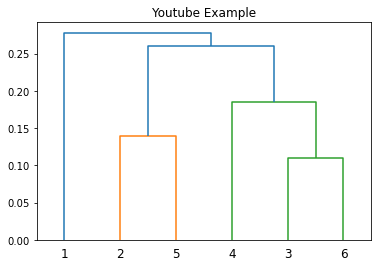

array([0.278, 0.278, 0.278, 0.278, 0.278, 0.26 , 0.26 , 0.14 , 0.26 ,
       0.185, 0.26 , 0.11 , 0.26 , 0.185, 0.26 ])

In [42]:
#https://www.youtube.com/watch?v=T1ObCUpjq3o
mat = np.array([[0.00, 0.23, 0.22, 0.37, 0.34,0.23],
                [0.23, 0.00, 0.15, 0.20, 0.14,0.25], 
                [0.22, 0.15, 0.00, 0.15, 0.28,0.11],
                [0.37, 0.20, 0.15, 0.00, 0.29,0.22], 
                [0.34, 0.14, 0.28, 0.29, 0.00,0.39],
                [0.23, 0.25, 0.11, 0.22, 0.39,0.00]
               ])
dists = squareform(mat)
linkage_matrix = linkage(dists, method="average")
dendrogram(linkage_matrix, labels=["1", "2", "3","4","5","6"])
plt.title("Youtube Example")
plt.show()
c, coph_dists = cophenet(linkage_matrix, dists)
coph_dists

## Heurística de MacNaughton-Smith - algoritmo hierárquico divisivo
## Exercício slide 25 
## Agrupamento de Dados e Aplicações Algoritmos Hierárquicos Créditos IV

In [34]:
import numpy as np;
import pandas as pd
num_clusters = 0
mat = np.array([[0,2,6,10,9],
                [2,0,5,9,8],
                [6,5,0,4,5],
                [10,9,4,0,3],
                [9,8,5,3,0]])
all_elements = ['1','2','3','4','5']
dissimilarity_matrix = pd.DataFrame(mat,index=all_elements, columns=all_elements)

In [35]:
def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg
def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg

In [36]:
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

In [37]:
def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index

In [40]:
current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1

1 [['5']]


In [39]:
print(level, current_clusters)

5 [['3'], ['5'], ['4'], ['2'], ['1']]
